In [1]:
# Kaggle Pima Indians Diabetes Dataset - 당뇨병 발병 예측 프로젝트

# 머신러닝에서 로지스틱 회귀를 학습하는 일반적인 데이터 - 759 x 9 크기의 형상을 가지는 csv 파일
# ============================================ 정답을 만들어 내는 입력 데이터(feature), 8열 =============================   = 정답(label), 1열 =
# 임신횟수  ,    포도당농도,    혈압,       삼두근 피부두께,    혈정 인슐인,   체질량,          당뇨 직계 가족력,   나이,           당뇨병 발병여부 
# -0.294118,    0.487437,    0.180328,  -0.292929,        0,            0.00149028,     -0.53117,       -0.0333333,     0
# -0.882353,    -0.145729,   0.0819672, -0.414141,        0,            -0.207153,      -0.766866,      -0.666667,      1


In [2]:
# 라이브러리, GPU 설정
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('Pytorch Version : ', torch.__version__, ', Device : ', DEVICE)

Pytorch Version :  2.7.1+cu118 , Device :  cuda


In [3]:
# 학습데이터 정의
loaded_data = np.loadtxt(fname='.\\data\\diabetes.csv', delimiter=',')

x_train_np = loaded_data[:, 0:-1] # 입력데이터, (759, 8)
y_train_np = loaded_data[:, [-1]] # 정답데이터, (759, 1)

print('loaded_data.shape = ', loaded_data.shape)
print('x_train_np.shape = ', x_train_np.shape)
print('y_train_np.shape = ', y_train_np.shape)

loaded_data.shape =  (759, 9)
x_train_np.shape =  (759, 8)
y_train_np.shape =  (759, 1)


In [4]:
# 넘파이 -> 텐서
x_train = torch.Tensor(x_train_np).to(DEVICE)
y_train = torch.Tensor(y_train_np).to(DEVICE)

print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)

x_train.shape =  torch.Size([759, 8])
y_train.shape =  torch.Size([759, 1])


In [5]:
# 로지스틱회귀 모델 구축
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.logistic_stack = nn.Sequential(
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.logistic_stack(x)
        return x

In [6]:
# 모델 걕체, 손실함수, 최적화함수 생성

model = LogisticRegressionModel().to(DEVICE)

loss_function = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 모델 초기화 파라미터(가중치, 바이어스) 값 확인
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[-0.1154,  0.0234, -0.1319, -0.3033,  0.3299, -0.1905, -0.2851, -0.0780]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.2274], device='cuda:0', requires_grad=True)


In [7]:
# 모델 학습
train_loss_list = []
train_accuracy_list = []

nums_epoch = 5000

for epoch in range(nums_epoch + 1):
    
    # 예측값
    outputs = model(x_train)

    # 손실값
    loss = loss_function(outputs, y_train)

    # 손실값 업데이트
    train_loss_list.append(loss.item())

    # 정확도 계산
    prediction = outputs > 0.5 # sigmoid 특성상 모델 예측값 > 0.5 이면 True, 아니면 False 이므로
    correct = (prediction.float() == y_train) # True 일때는 1.0 / False 일때는 0.0 으로 타입캐스팅해서 정답 y_train과 비교함
    accuracy = correct.sum().item() / len(correct)

    # 정확도값 업데이트
    train_accuracy_list.append(accuracy)

    # 오차역전파
    optimizer.zero_grad() # 미분 초기화(가중치, 바이어스 파라미터)
    loss.backward() # 미분 연산
    optimizer.step() # 미분 연산 후 파라미터(가중치, 바이어스) 업데이트

    # 출력
    if epoch % 100 == 0:
        print('epoch = ', epoch, ', current loss = ', loss.item(), ', accuracy = ', accuracy)

epoch =  0 , current loss =  0.6351265907287598 , accuracy =  0.6548089591567853
epoch =  100 , current loss =  0.5685449838638306 , accuracy =  0.6758893280632411
epoch =  200 , current loss =  0.5363218188285828 , accuracy =  0.7299077733860343
epoch =  300 , current loss =  0.5174263119697571 , accuracy =  0.7602108036890646
epoch =  400 , current loss =  0.5054606199264526 , accuracy =  0.7654808959156785
epoch =  500 , current loss =  0.4974251389503479 , accuracy =  0.766798418972332
epoch =  600 , current loss =  0.4917873442173004 , accuracy =  0.7707509881422925
epoch =  700 , current loss =  0.4876980781555176 , accuracy =  0.7720685111989459
epoch =  800 , current loss =  0.484654039144516 , accuracy =  0.769433465085639
epoch =  900 , current loss =  0.4823400676250458 , accuracy =  0.7654808959156785
epoch =  1000 , current loss =  0.48054996132850647 , accuracy =  0.766798418972332
epoch =  1100 , current loss =  0.47914403676986694 , accuracy =  0.766798418972332
epoch =

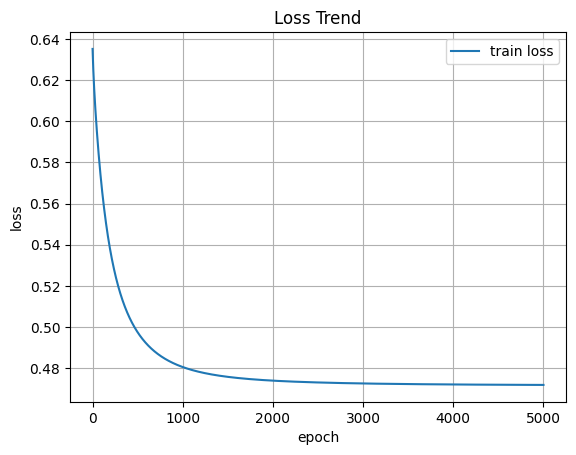

In [10]:
# 시각화 - 손실함수
plt.title('Loss Trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(train_loss_list, label='train loss')
plt.grid()
plt.legend(loc='best')
plt.show()

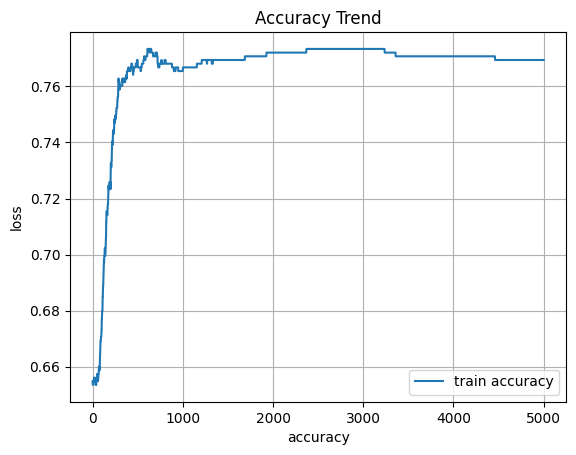

In [11]:
# 시각화 - 정확도
plt.title('Accuracy Trend')
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.plot(train_accuracy_list, label='train accuracy')
plt.grid()
plt.legend(loc='best')
plt.show()
